# MNIST Handwritten Digits Dataset #
## Hello World of Computer Vision ##

Great educational dataset used to practice fundamental computer vision concepts with TensorFlow.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
# normalize the data
x_train, x_test = x_train / 255., x_test / 255.

In [3]:
# check the shape
x_train.shape

(60000, 28, 28)

In [4]:
# looks like 60,000 training images and 10,000 test images, 28 pixels by 28 pixels black and white
x_test.shape

(10000, 28, 28)

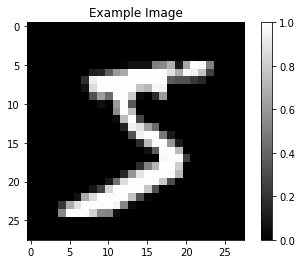

In [5]:
# Take a look at the data using the first entry as an example
x = x_train[0]

plt.figure()
plt.title("Example Image")
plt.imshow(x, cmap="gray")
plt.colorbar()
plt.show()

Okay great, we have a dataset of very basic handwritten digits.  Now we will build a model to classify them!

In [6]:
# Set up a callback to automate training to a desired accuracy
desired_acc = 0.9999

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>desired_acc):
      print('\nReached 99.99% accuracy so cancelling training!')
      self.model.stop_training = True

In [7]:
# Set up callback
callbacks = myCallback()

# Build the model from scratch
model = tf.keras.models.Sequential([
                                    # Flatten the input
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    # Add hidden layers
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    # Softmax output layer due to multiclass 
                                    tf.keras.layers.Dense(10, activation='softmax'),
])

In [8]:
# compile the model with Adam optimizer and categorical cross entropy as it is a multiclass problem
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
# fit the model, run for up to 100 epochs or until 99.99% accuracy is reached
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4003 - accuracy: 0.8772 - val_loss: 0.1358 - val_accuracy: 0.9580
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1179 - accuracy: 0.9647 - val_loss: 0.1337 - val_accuracy: 0.9621
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9743 - val_loss: 0.1071 - val_accuracy: 0.9715
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0706 - accuracy: 0.9800 - val_loss: 0.0956 - val_accuracy: 0.9736
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0558 - accuracy: 0.9841 - val_loss: 0.0946 - val_accuracy: 0.9731
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0506 - accuracy: 0.9853 - val_loss: 0.0944 - val_accuracy: 0.9783
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0876 - val_a

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9978 - val_loss: 0.4900 - val_accuracy: 0.9738
Epoch 58/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9970 - val_loss: 0.1894 - val_accuracy: 0.9804
Epoch 59/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.2661 - val_accuracy: 0.9813
Epoch 60/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0119 - accuracy: 0.9976 - val_loss: 0.2591 - val_accuracy: 0.9822
Epoch 61/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0131 - accuracy: 0.9981 - val_loss: 0.2948 - val_accuracy: 0.9695
Epoch 62/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.2722 - val_accuracy: 0.9805
Epoch 63/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0122 - accuracy: 0.9981 - val_loss: 0.2046 - val_accuracy

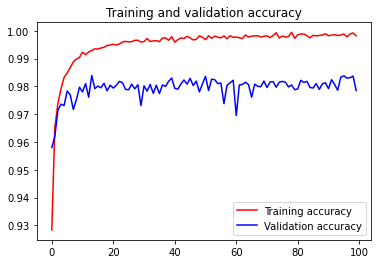

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Awesome!  The Hello World of Computer Vision!  Great example of the basic fundamentals of working with TensorFlow.  

Evaluating the performance, as we can see unfortunately we did not hit that 99.9% accuracy, and looking at our curves we can see there is room for improvement.  But this was just a brief introduction and a fairly simple neural net that still attained 99.8% training and 98.3% testing accuracy, not too bad!

Now on to bigger challenges!